In [28]:
import nsepy as nse
import datetime
import urllib3 
import random 
import numpy as np 
from pandas_datareader import data, wb
import pandas as pd
import nsepy as nse
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
import datetime
from nsetools import Nse
nsel = Nse()
stock_list = nsel.get_stock_codes() 
stock_list= {v: k for k, v in stock_list.items()} 
#print(stock_list)
Today = datetime.datetime.now() 
 #taking the number of companies to predict 
tickers =['ASHOKLEY','BALMLAWRIE','NBCC','TATAPOWER','CDSL'] 
df = pd.DataFrame([nse.get_history(symbol=ticker, start=datetime.datetime(2019,11,1), end=datetime.datetime(2021,3,27))['Close'] for ticker in tickers]).T
df.columns = tickers

In [29]:

print(df)

            ASHOKLEY  BALMLAWRIE   NBCC  TATAPOWER    CDSL
Date                                                      
2019-11-01     75.95      197.25  37.50      59.50  234.30
2019-11-04     75.20      202.35  38.55      59.70  235.90
2019-11-05     74.95      198.60  37.20      58.70  230.65
2019-11-06     76.80      197.45  38.40      58.90  222.70
2019-11-07     76.70      198.35  41.55      58.75  234.25
...              ...         ...    ...        ...     ...
2021-03-22    113.75      137.75  46.50     104.75  609.50
2021-03-23    114.75      135.05  47.90     104.55  637.70
2021-03-24    112.15      131.95  46.80     101.25  634.20
2021-03-25    109.80      128.10  45.95      98.65  627.50
2021-03-26    114.05      127.90  45.95     103.45  644.80

[352 rows x 5 columns]


<ipython-input-32-03d2f496a4cf>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

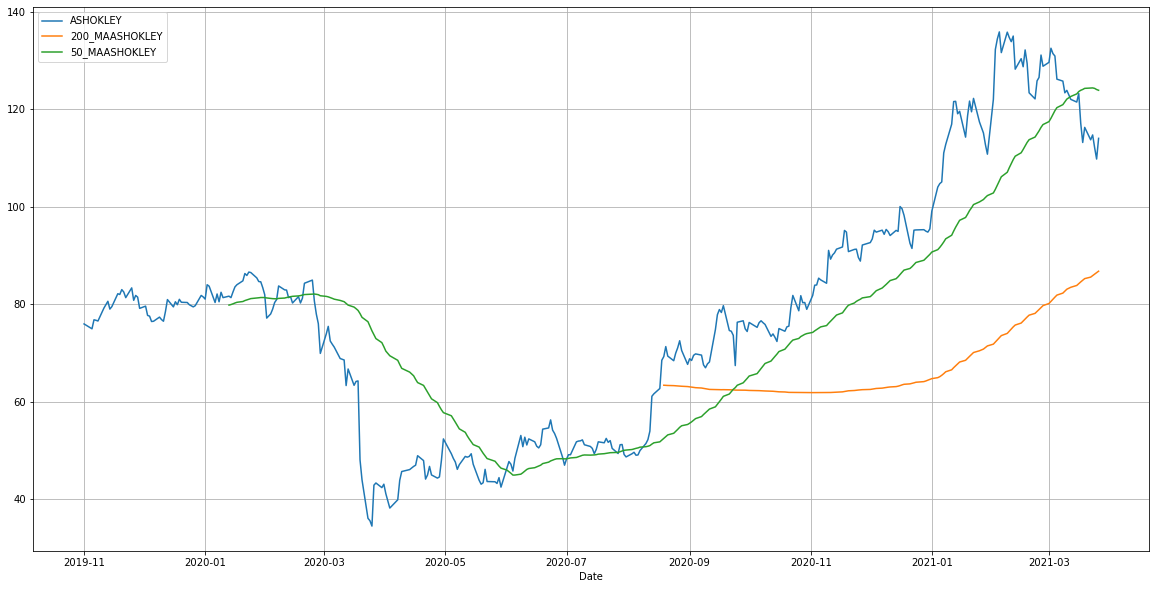

<Figure size 1440x720 with 0 Axes>

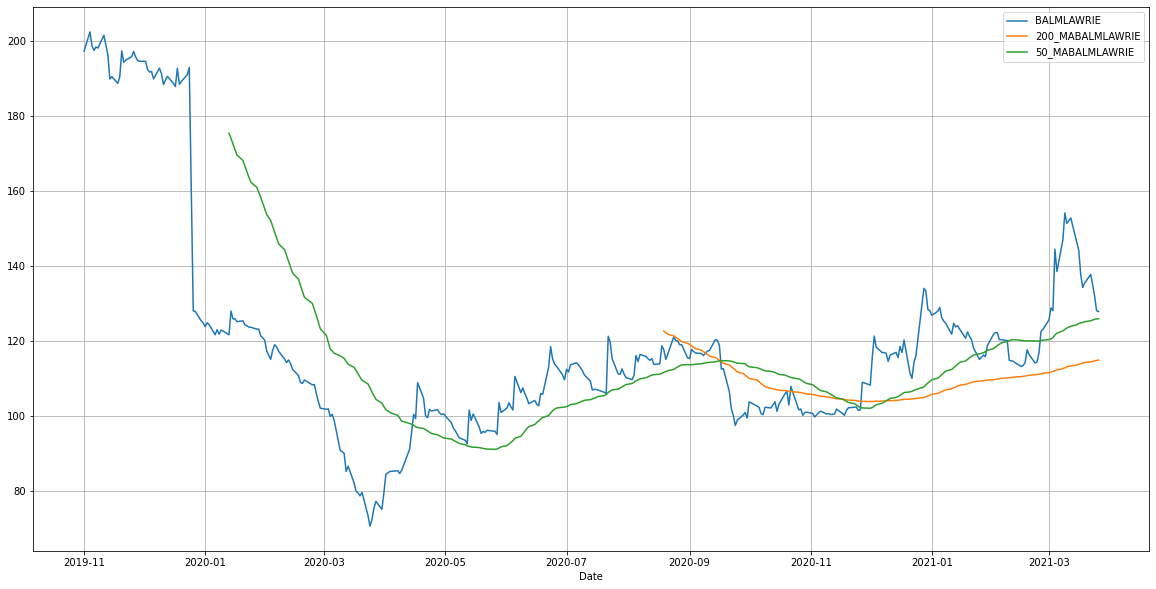

<Figure size 1440x720 with 0 Axes>

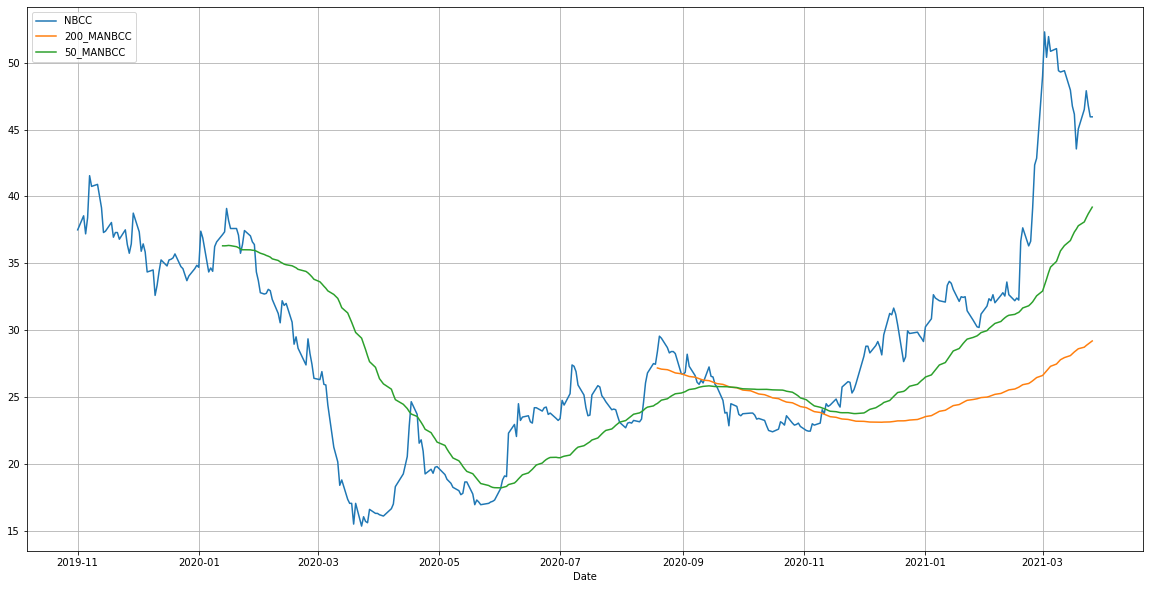

<Figure size 1440x720 with 0 Axes>

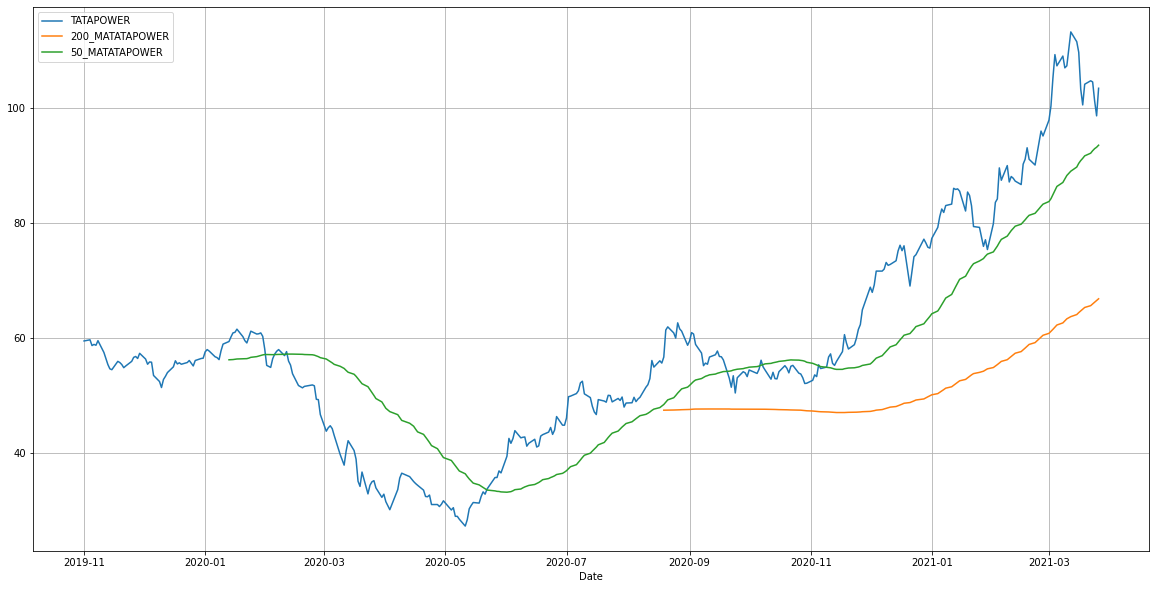

<Figure size 1440x720 with 0 Axes>

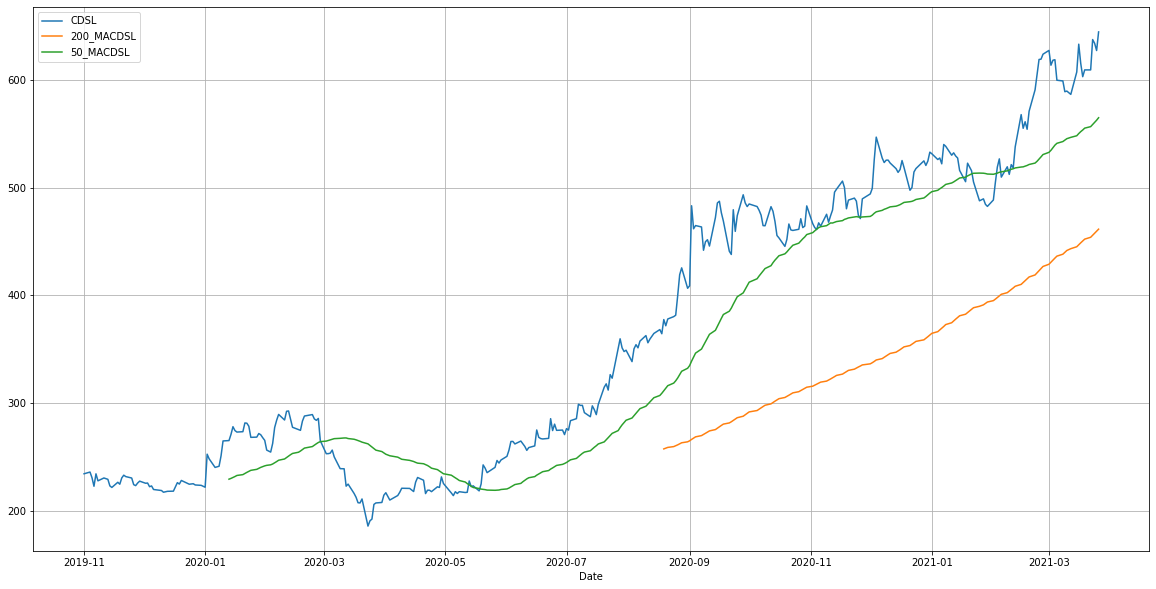

<Figure size 1440x720 with 0 Axes>

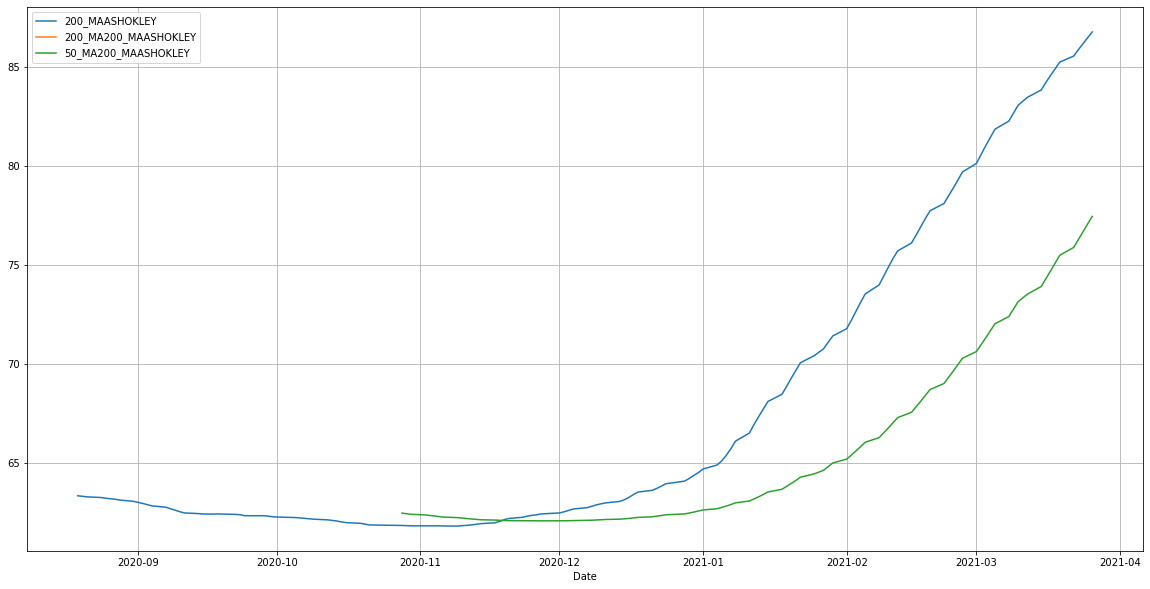

<Figure size 1440x720 with 0 Axes>

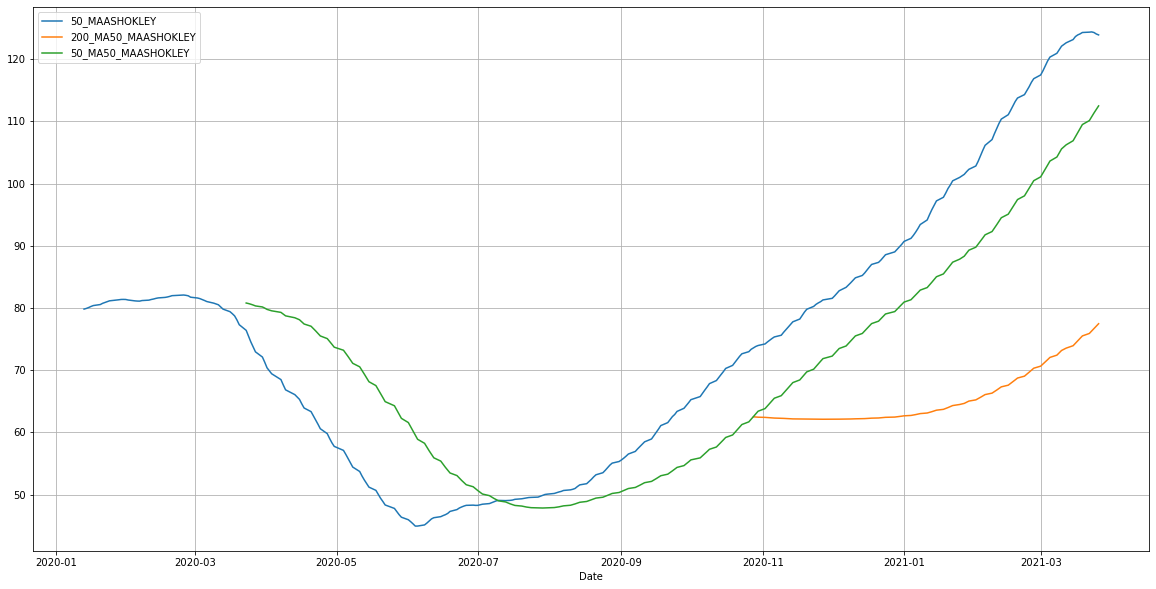

<Figure size 1440x720 with 0 Axes>

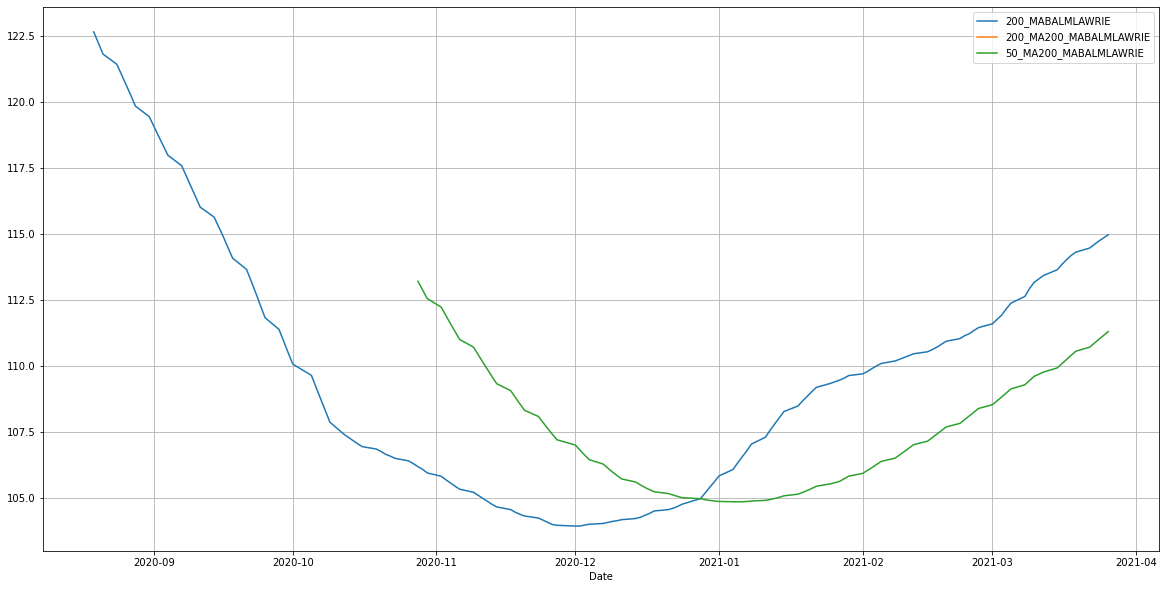

<Figure size 1440x720 with 0 Axes>

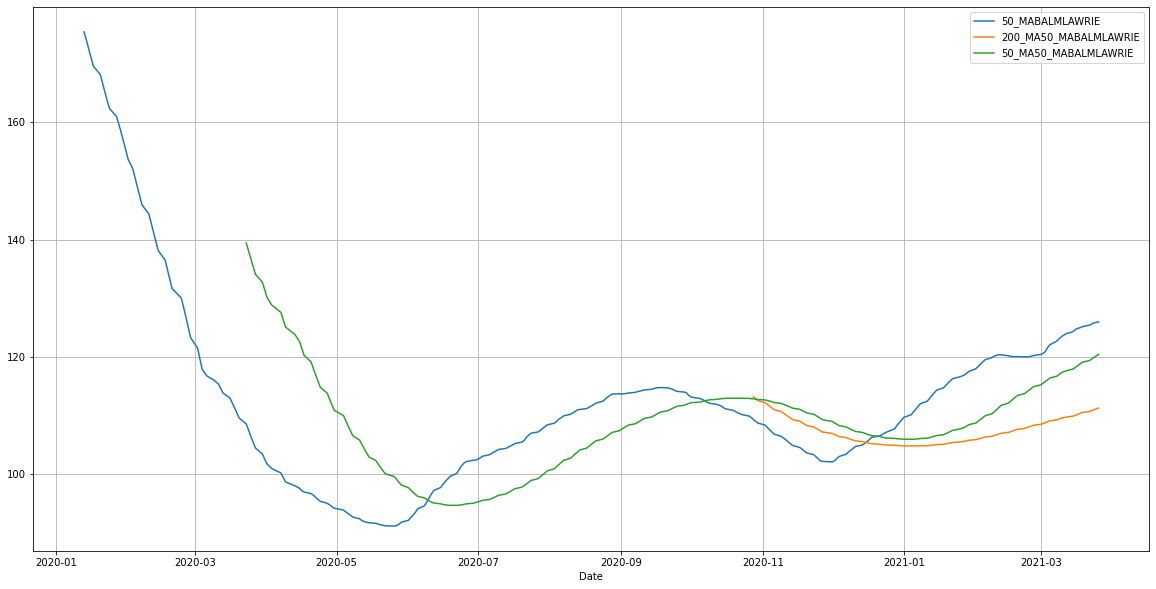

<Figure size 1440x720 with 0 Axes>

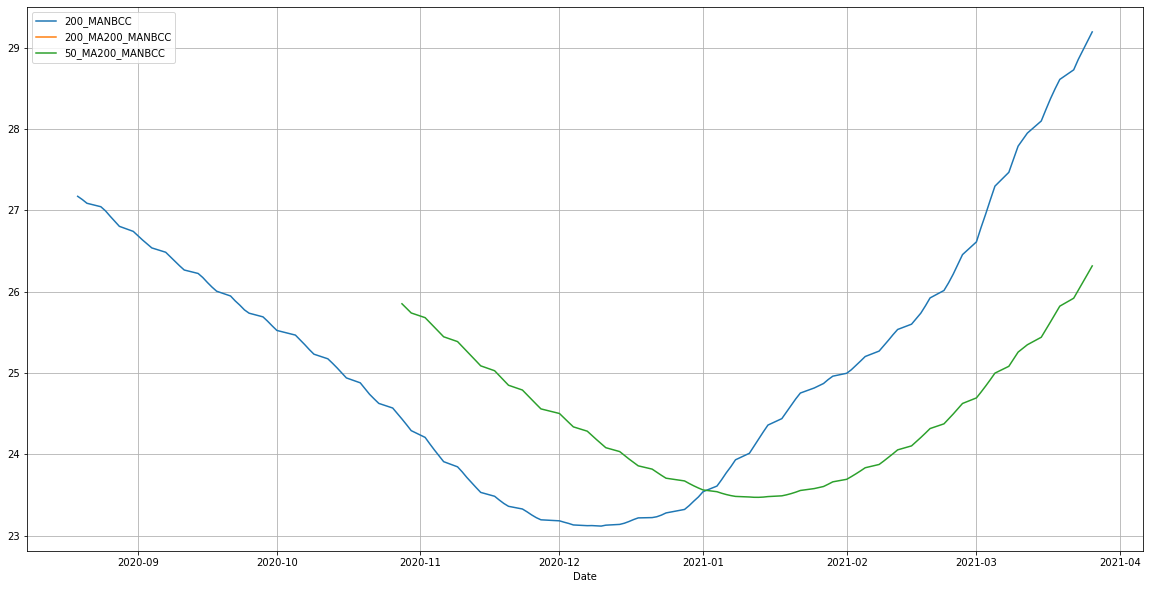

<Figure size 1440x720 with 0 Axes>

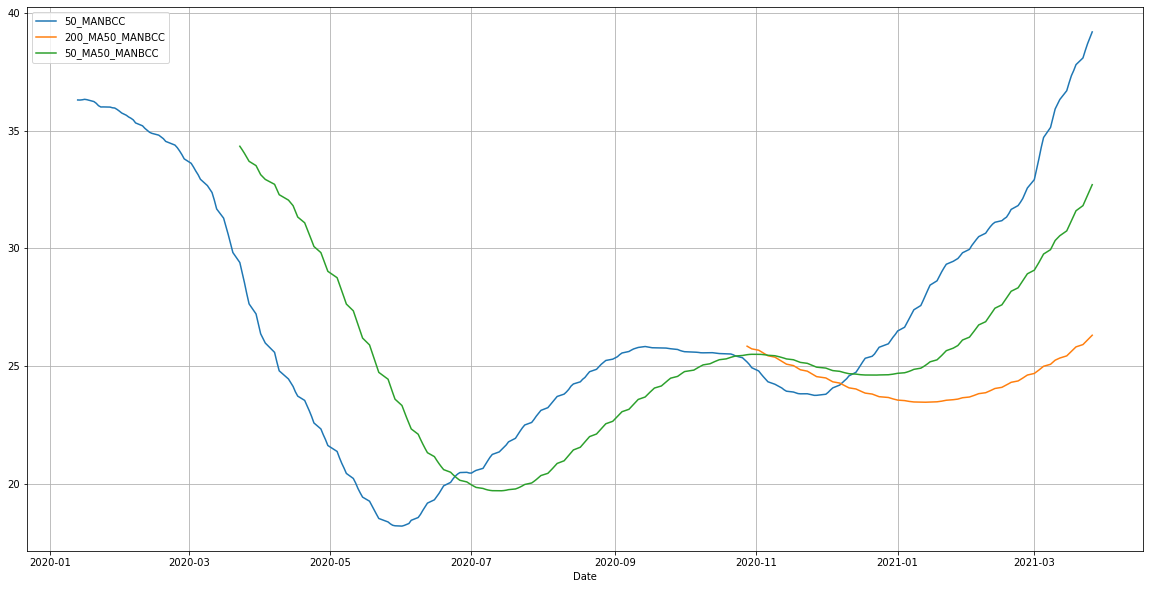

<Figure size 1440x720 with 0 Axes>

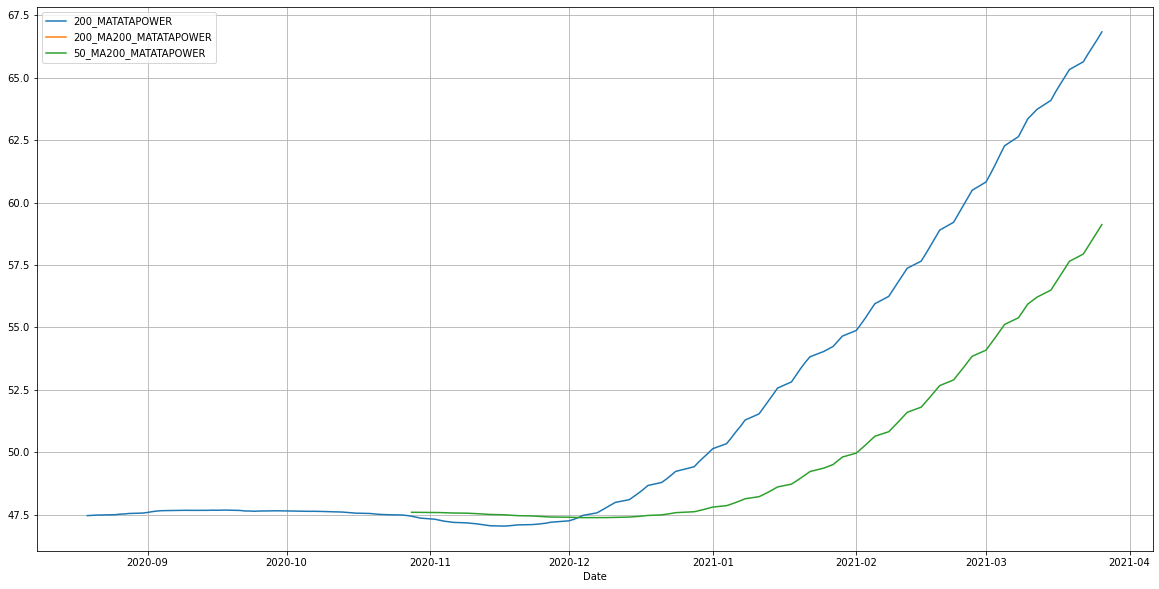

<Figure size 1440x720 with 0 Axes>

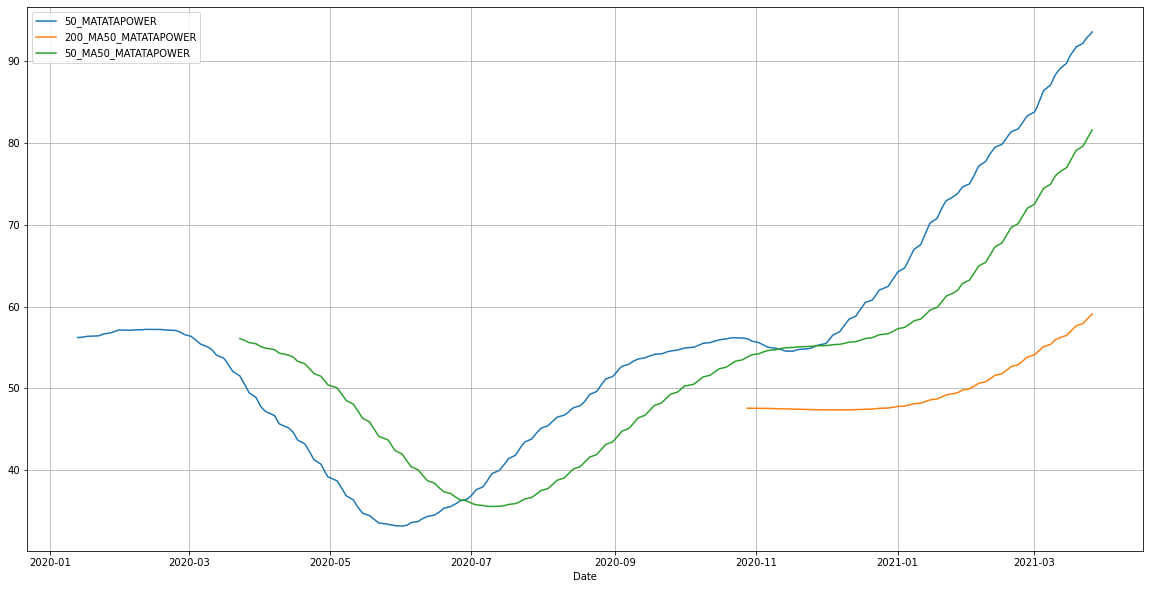

<Figure size 1440x720 with 0 Axes>

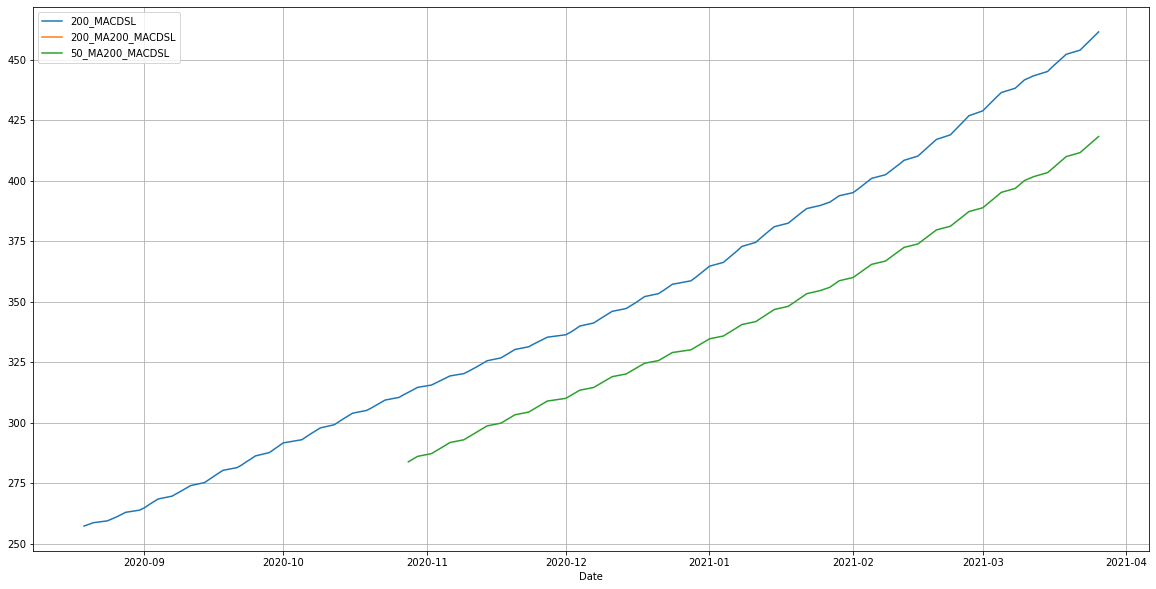

<Figure size 1440x720 with 0 Axes>

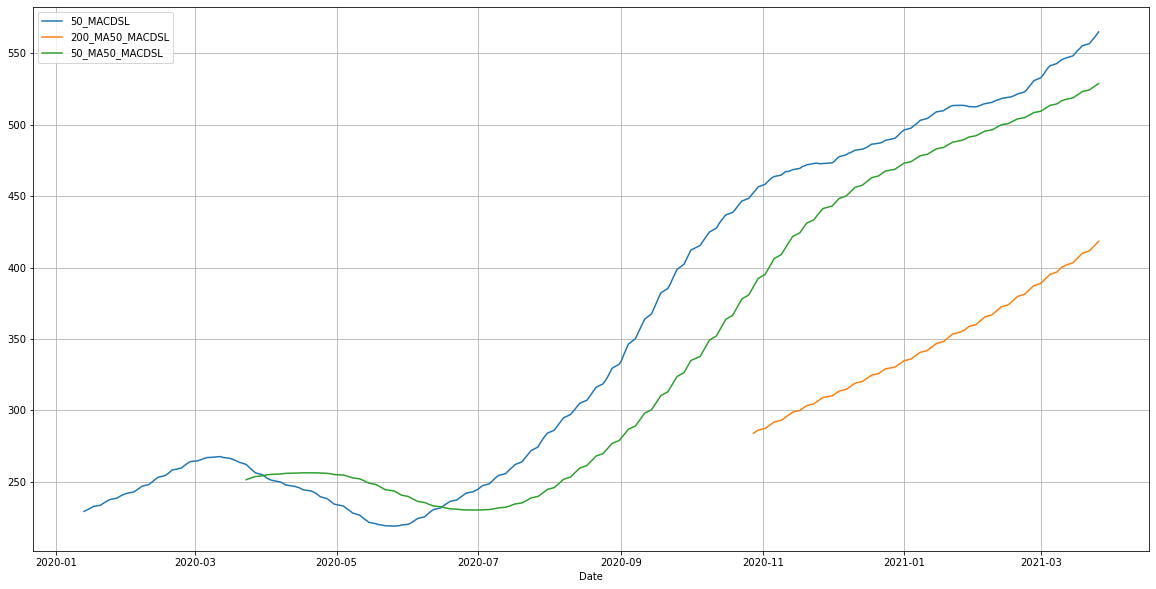

<Figure size 1440x720 with 0 Axes>

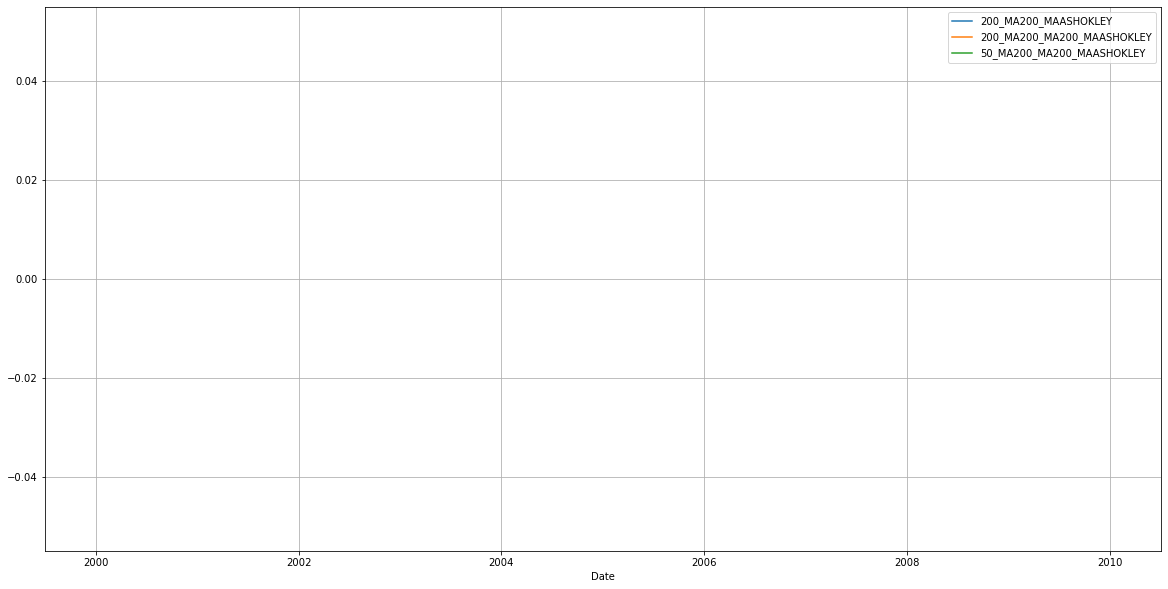

<Figure size 1440x720 with 0 Axes>

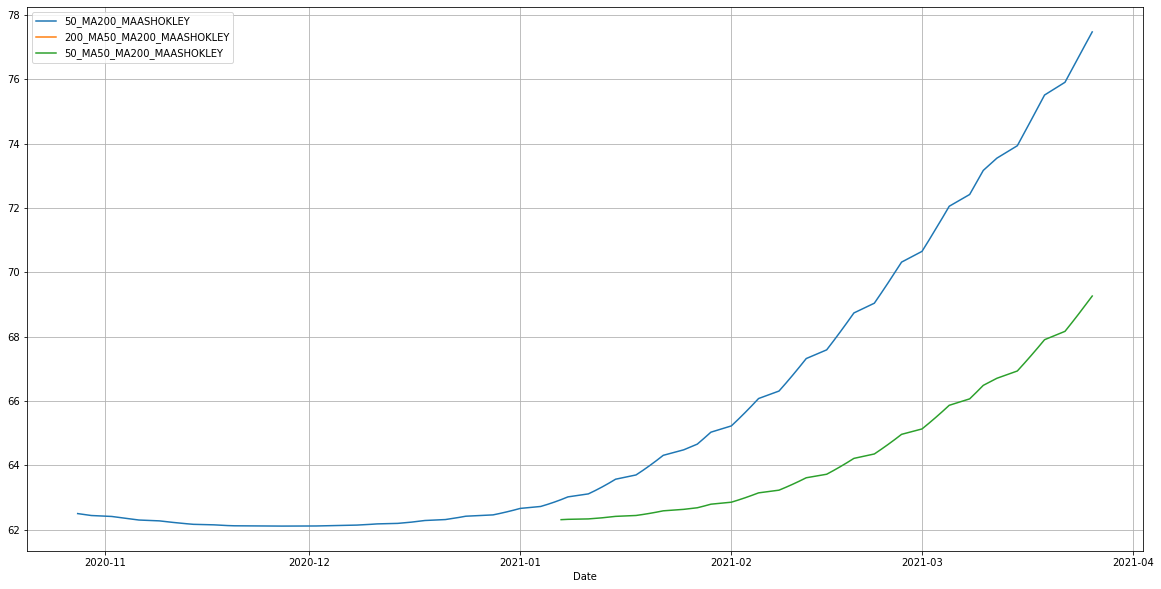

<Figure size 1440x720 with 0 Axes>

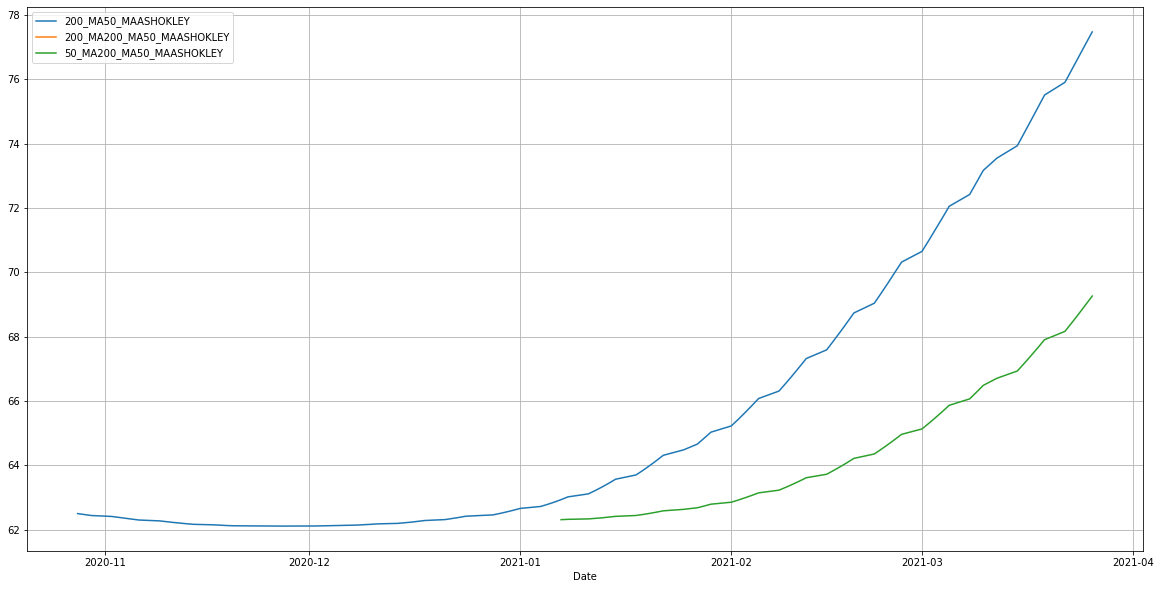

<Figure size 1440x720 with 0 Axes>

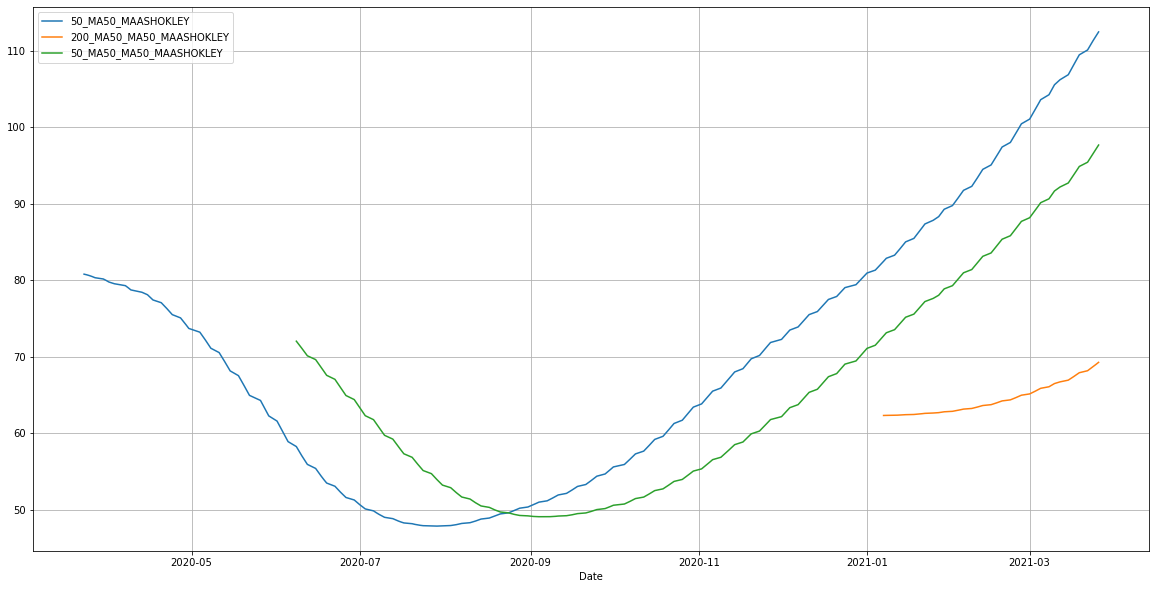

<Figure size 1440x720 with 0 Axes>

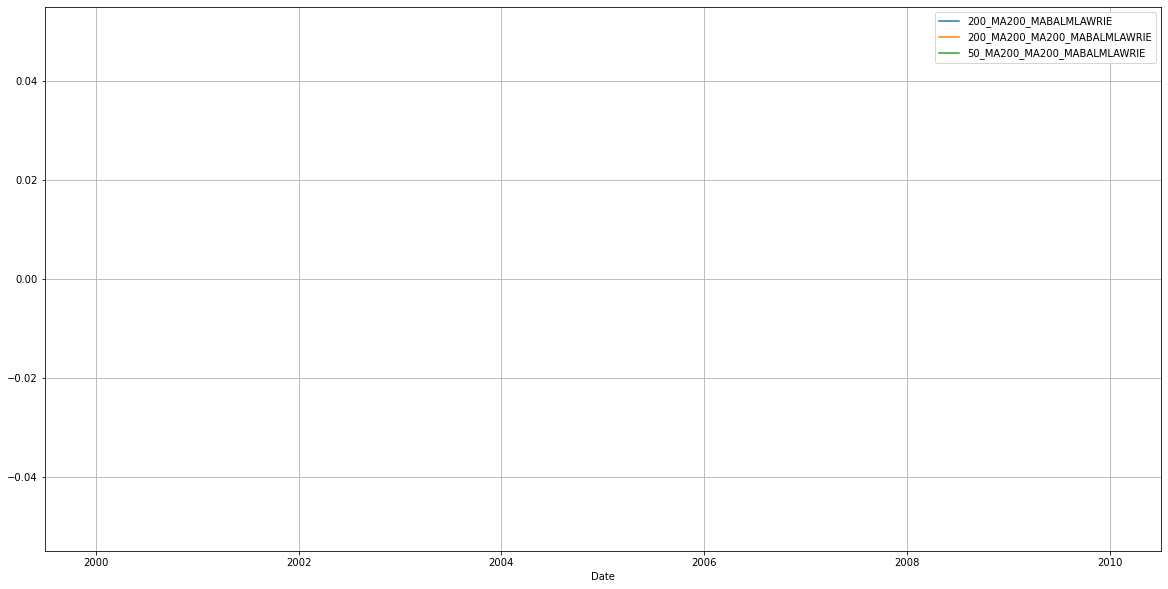

<Figure size 1440x720 with 0 Axes>

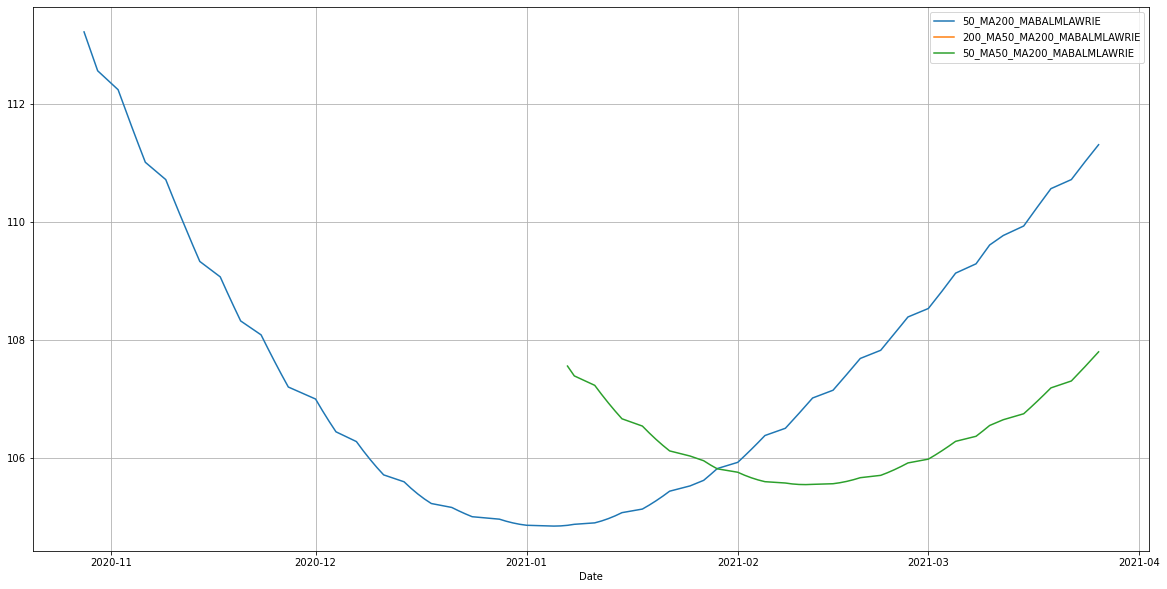

<Figure size 1440x720 with 0 Axes>

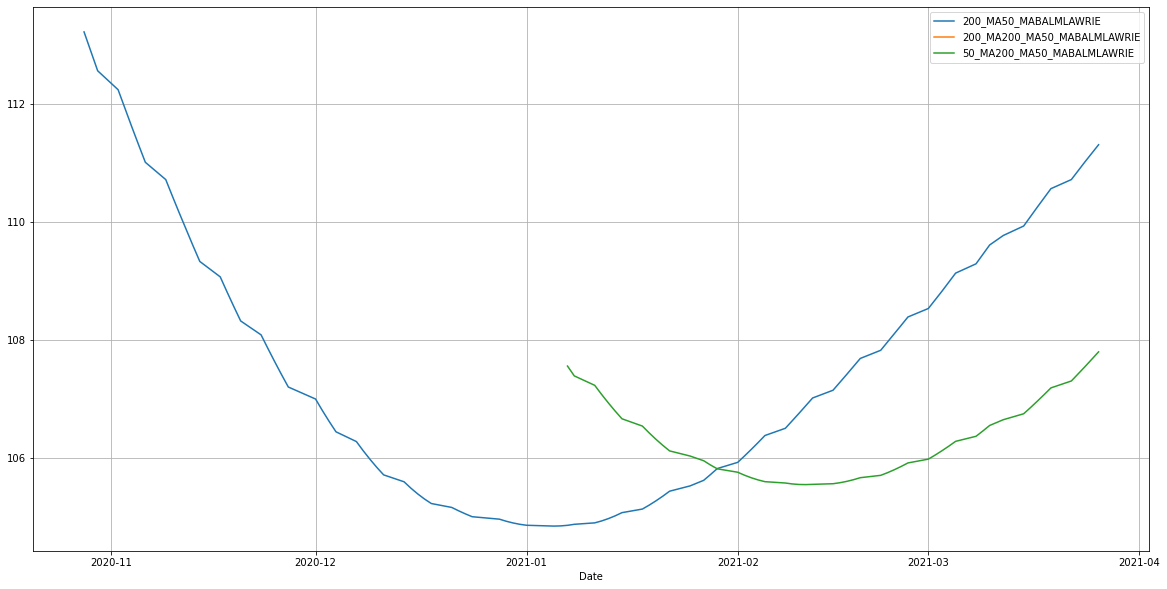

<Figure size 1440x720 with 0 Axes>

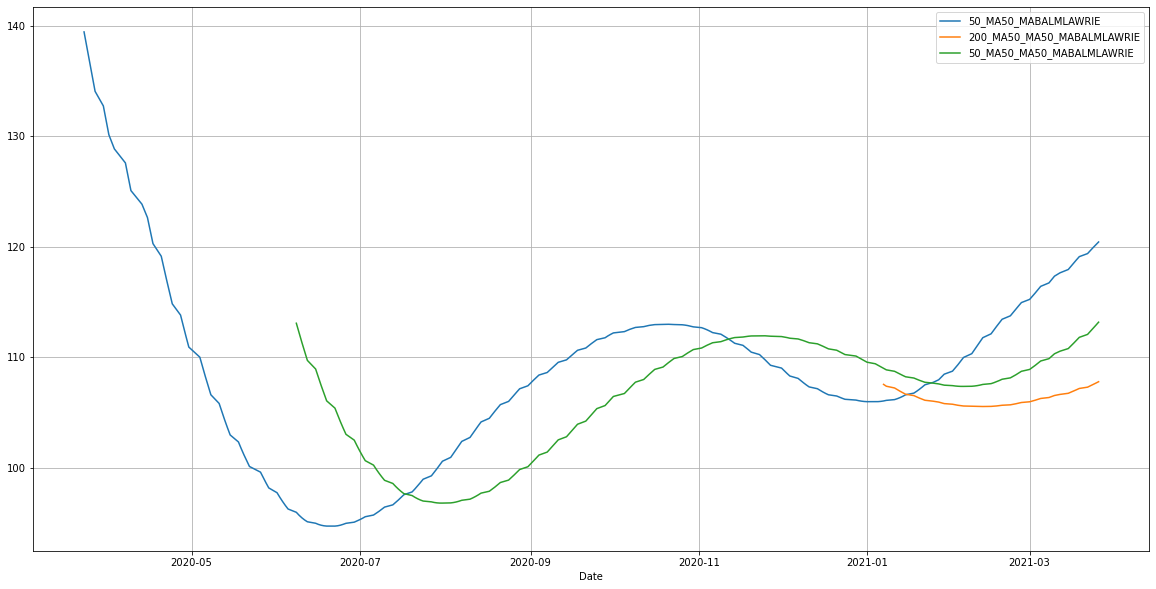

<Figure size 1440x720 with 0 Axes>

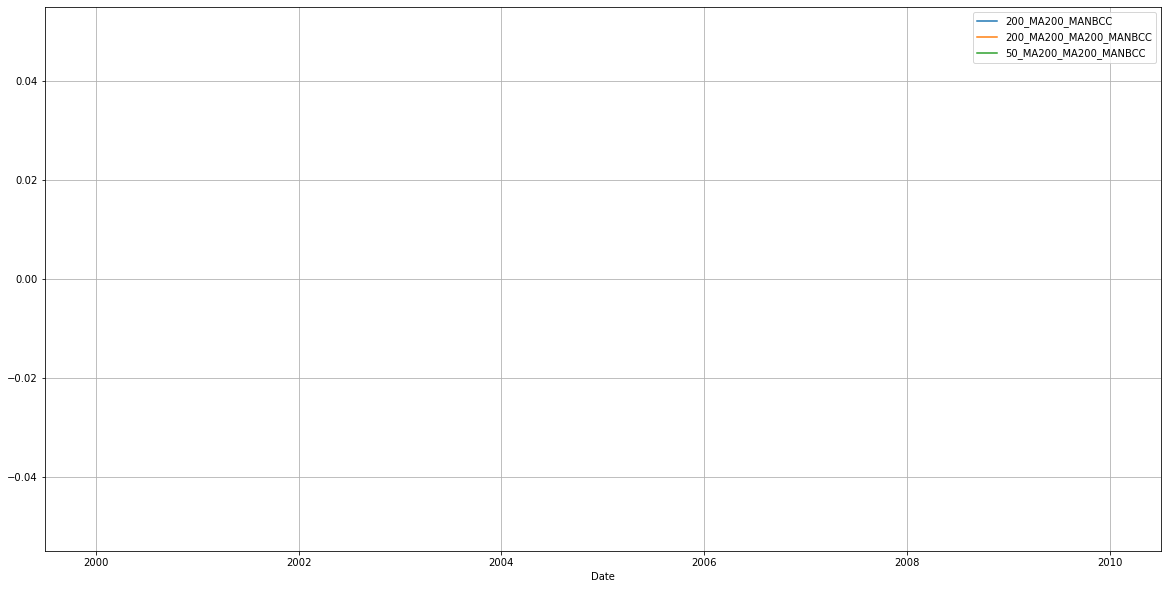

<Figure size 1440x720 with 0 Axes>

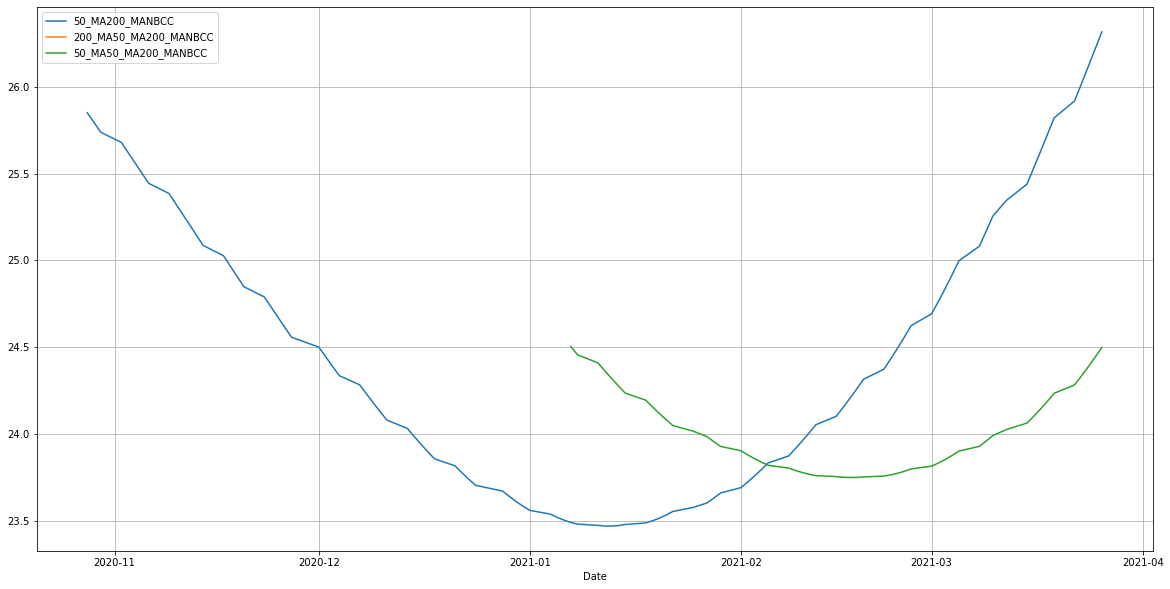

<Figure size 1440x720 with 0 Axes>

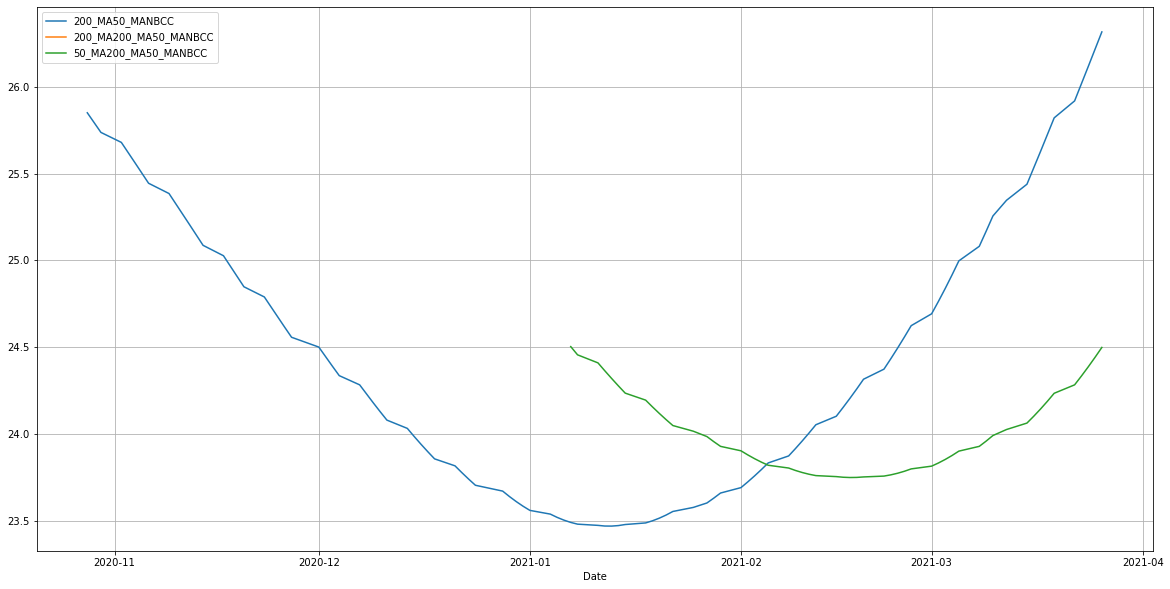

<Figure size 1440x720 with 0 Axes>

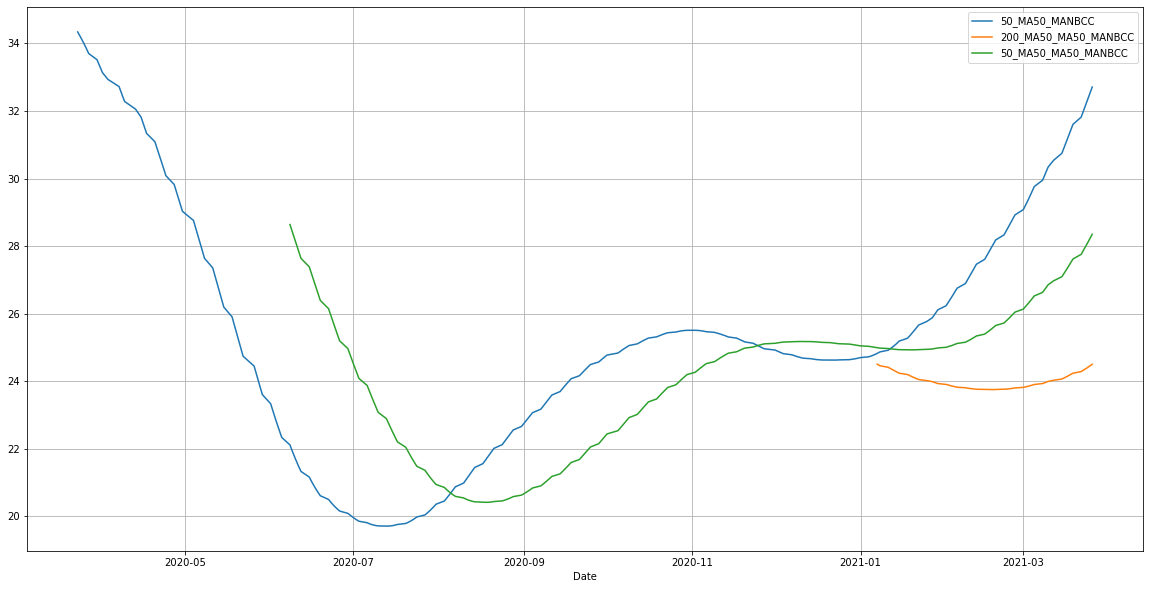

<Figure size 1440x720 with 0 Axes>

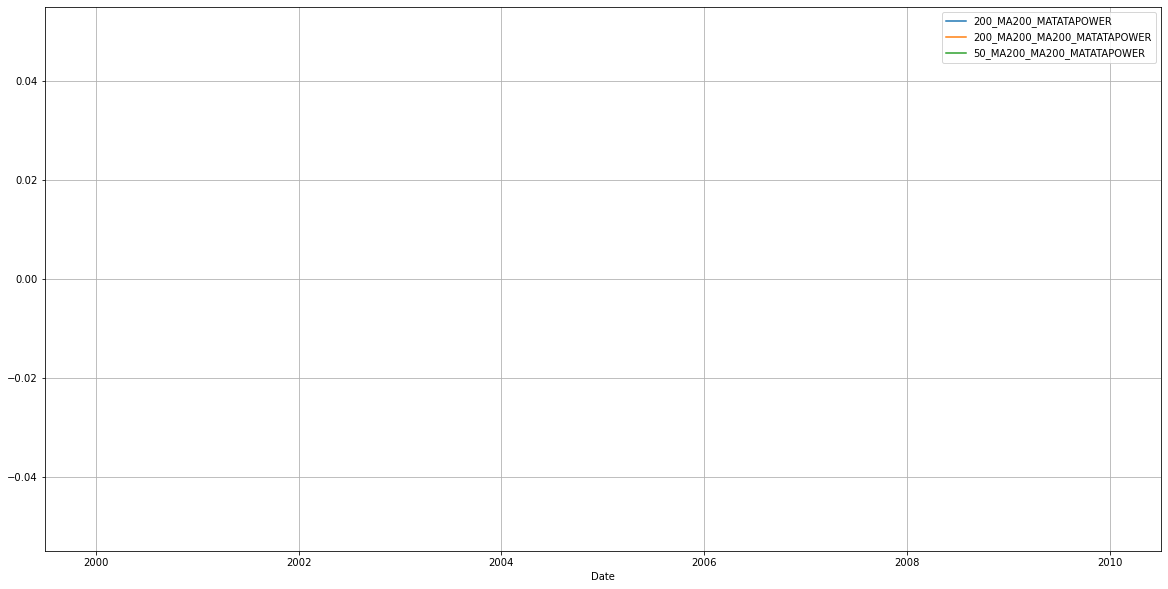

<Figure size 1440x720 with 0 Axes>

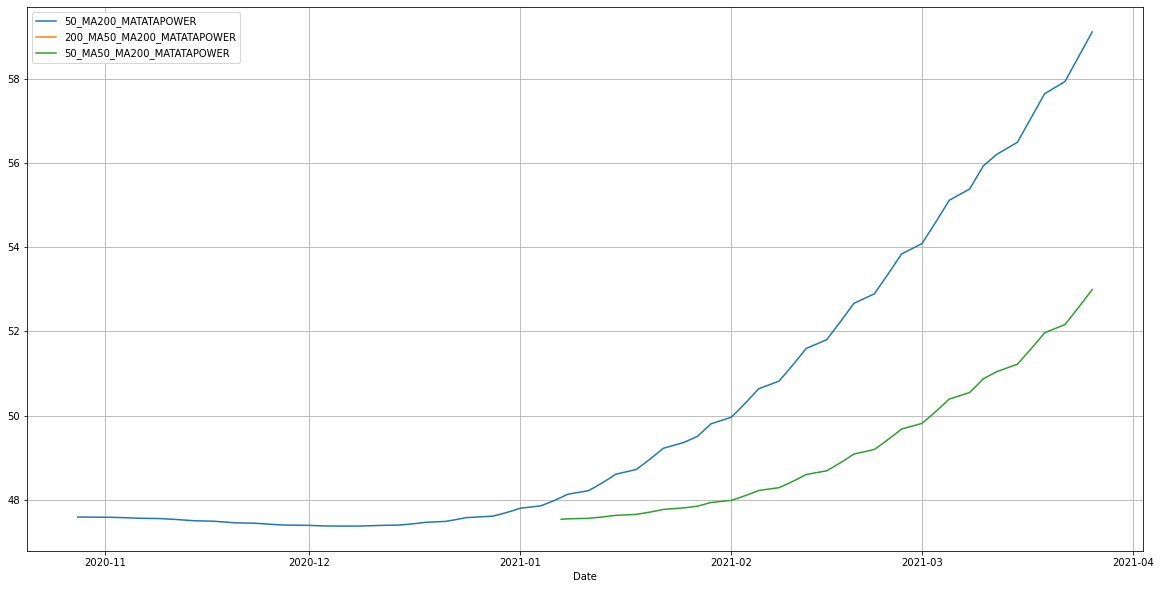

<Figure size 1440x720 with 0 Axes>

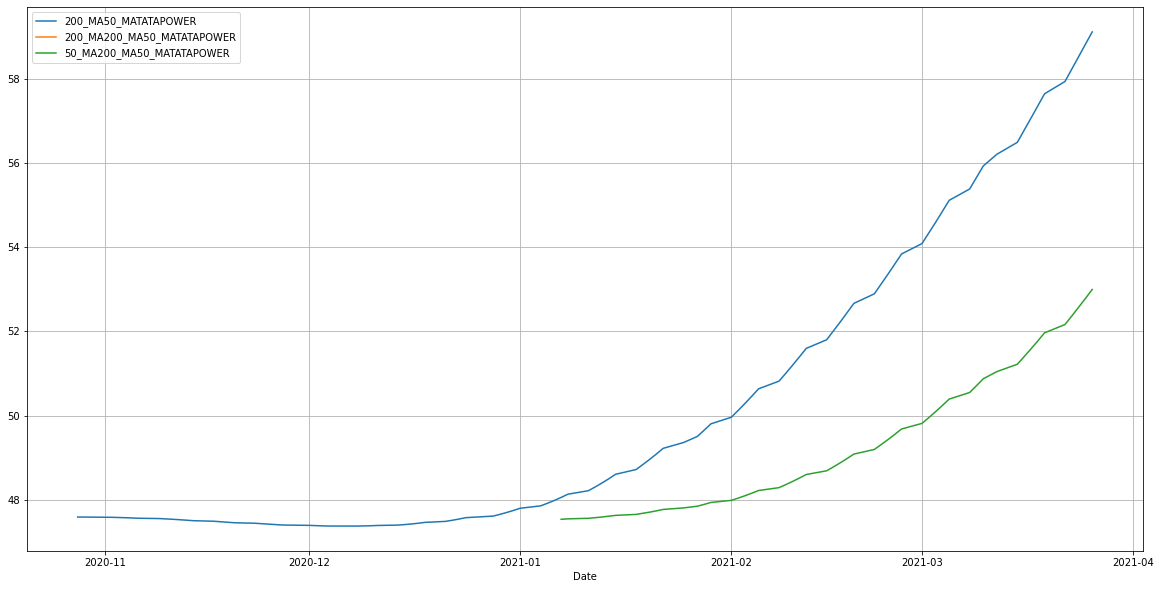

<Figure size 1440x720 with 0 Axes>

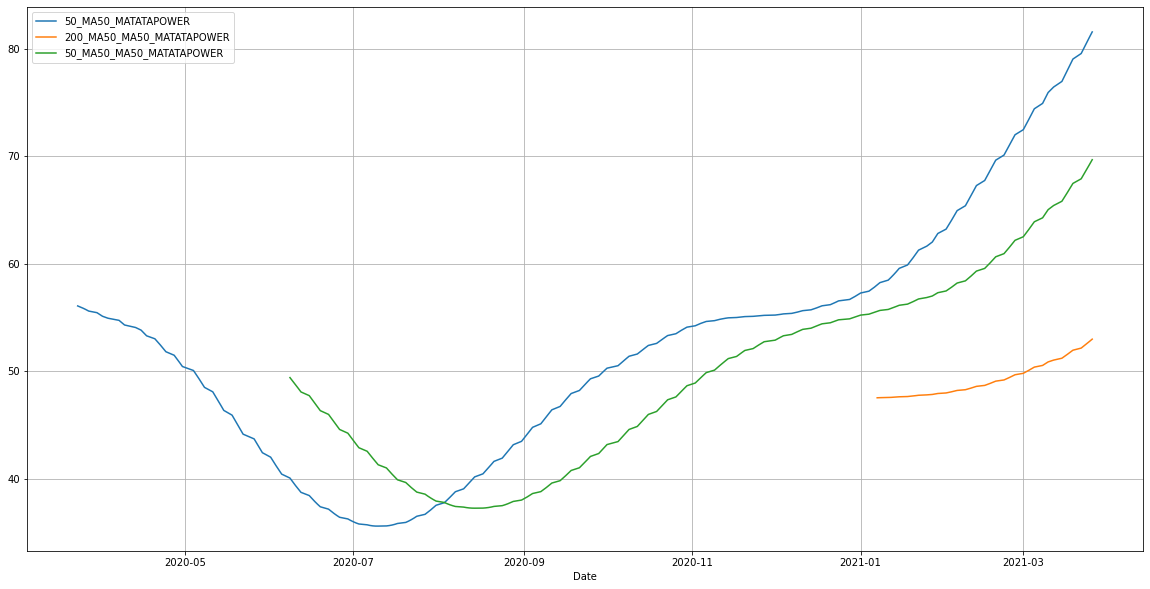

<Figure size 1440x720 with 0 Axes>

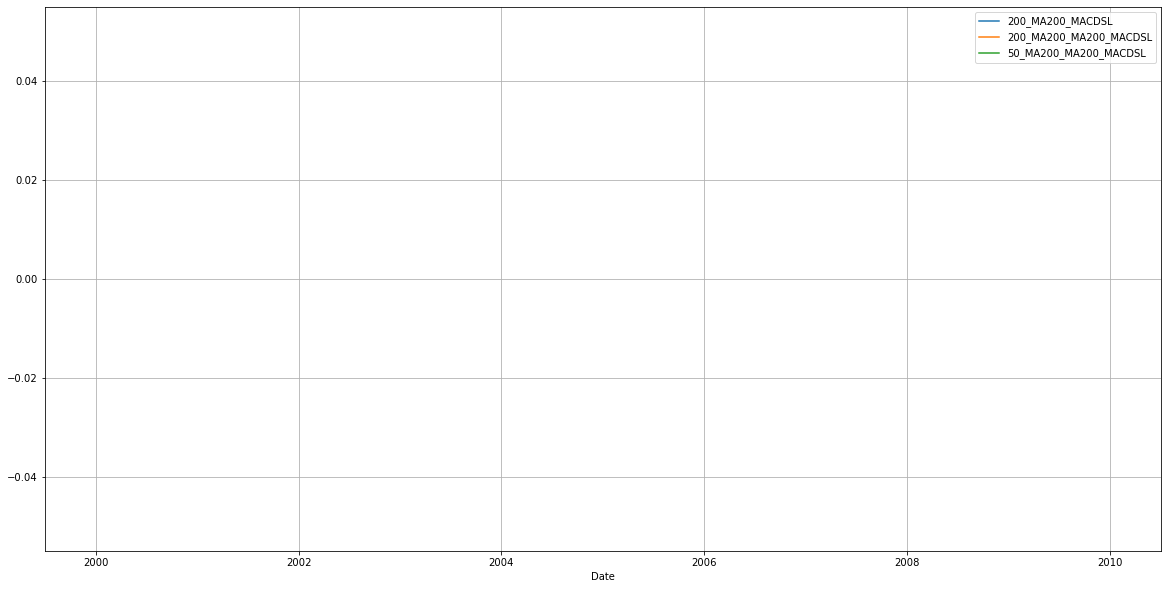

<Figure size 1440x720 with 0 Axes>

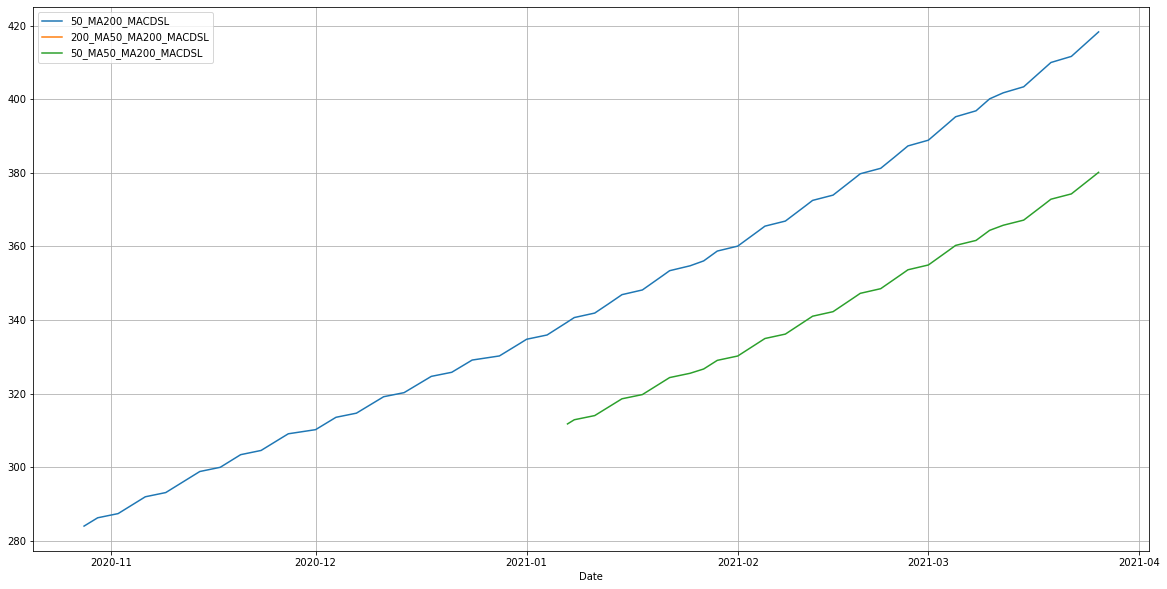

<Figure size 1440x720 with 0 Axes>

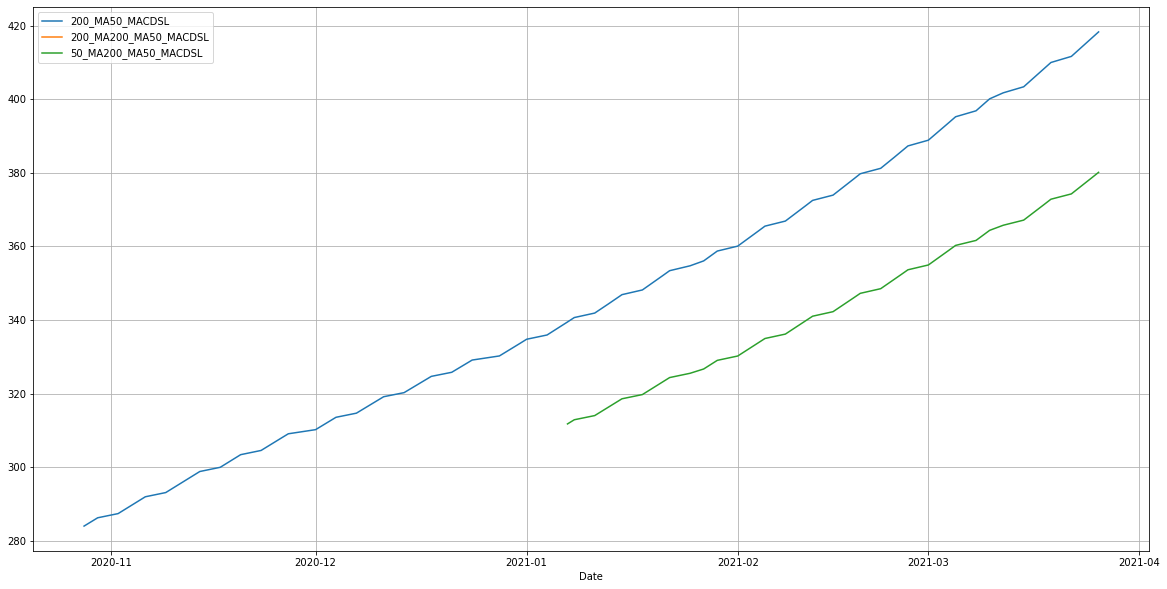

<Figure size 1440x720 with 0 Axes>

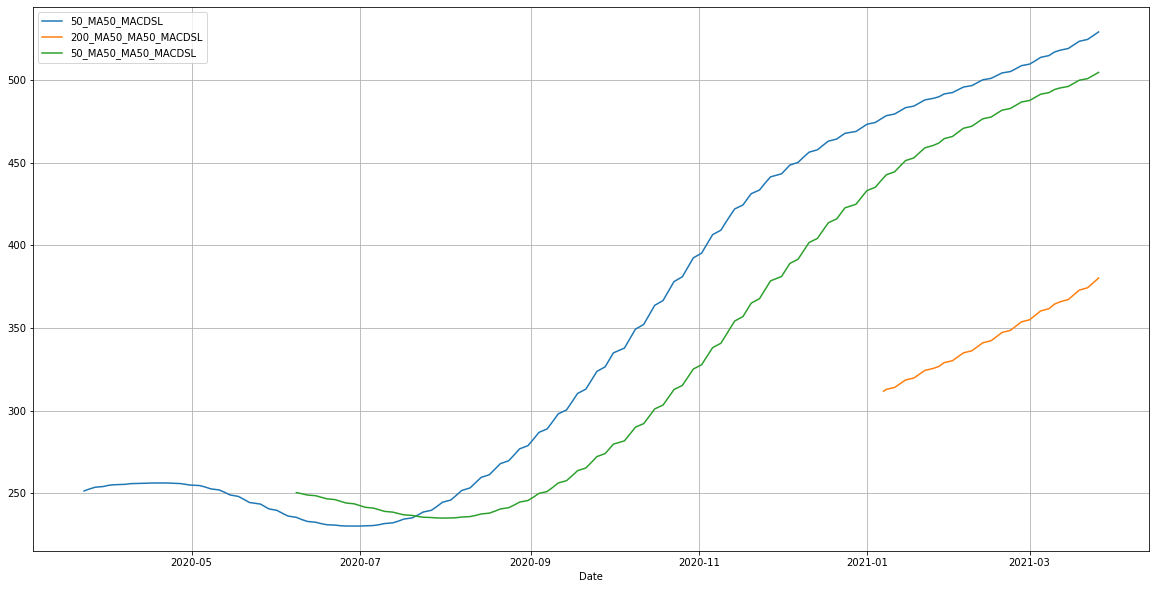

In [32]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

for i in df:
    # Show the plot
    df['200_MA'+i]=df[i].rolling(window=200).mean()
    df['50_MA'+i]=df[i].rolling(window=50).mean()
    plt.figure(figsize=(20,10))
    # Plot the closing prices for `df`
    df[[i,'200_MA'+i,'50_MA'+i]].plot(grid=True,figsize=(20,10))

plt.show()

In [5]:
def portfolio_performance(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio
def simulate_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = portfolio_performance(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [6]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
results_frame = simulate_portfolios(num_portfolios, mean_returns, cov, rf)

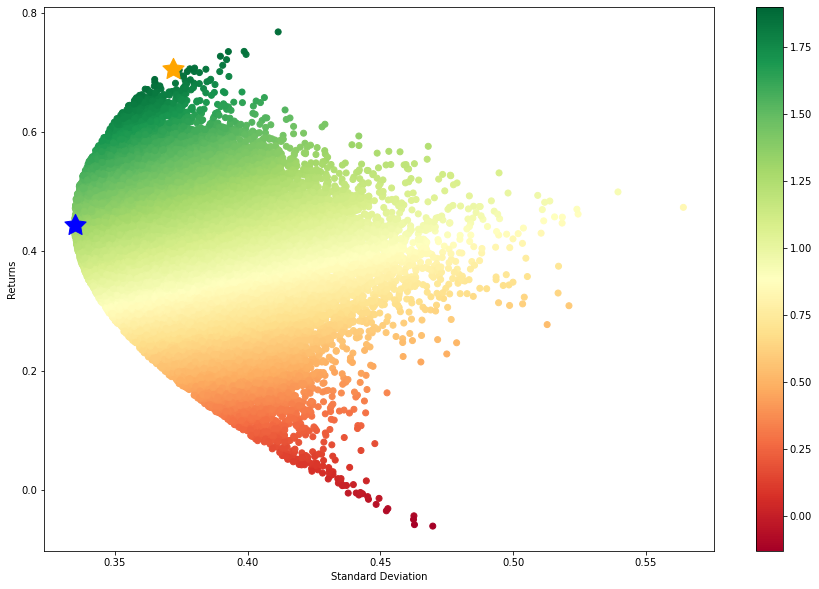

In [7]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlGn')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='orange',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='blue',s=500)
plt.show()


In [8]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
72742,0.706062,0.372016,1.897935,0.008904,0.02463,0.001368,0.27675,0.688348


In [9]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
90060,0.444333,0.334898,1.32677,0.071765,0.250385,0.030948,0.281928,0.364973


In [10]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [11]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T

,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
0,0.01,0.0,0.0,0.23,0.76


In [12]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_variance = min_variance(mean_returns, cov)

In [13]:
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T


,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
0,0.06,0.24,0.05,0.27,0.38


In [14]:
def calc_portfolio_performance_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var
def simulate_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_performance_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR'] + [ticker for ticker in tickers])
        
    return results_df

In [15]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
days = 252
alpha = 0.05
results_frame = simulate_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

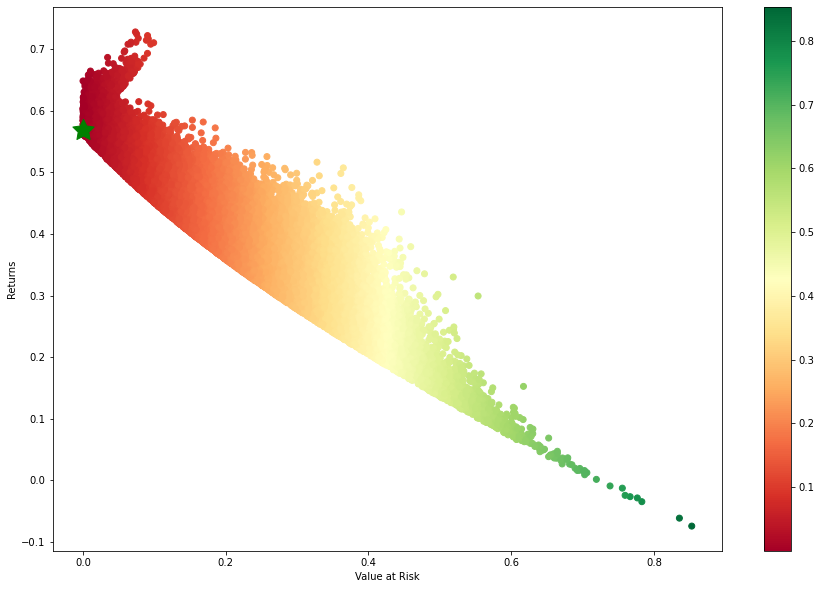

In [16]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlGn')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='green',s=500)
plt.show()

In [17]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
66365,0.569508,0.346237,4.038039e-07,0.158637,0.106691,0.013077,0.269637,0.451957


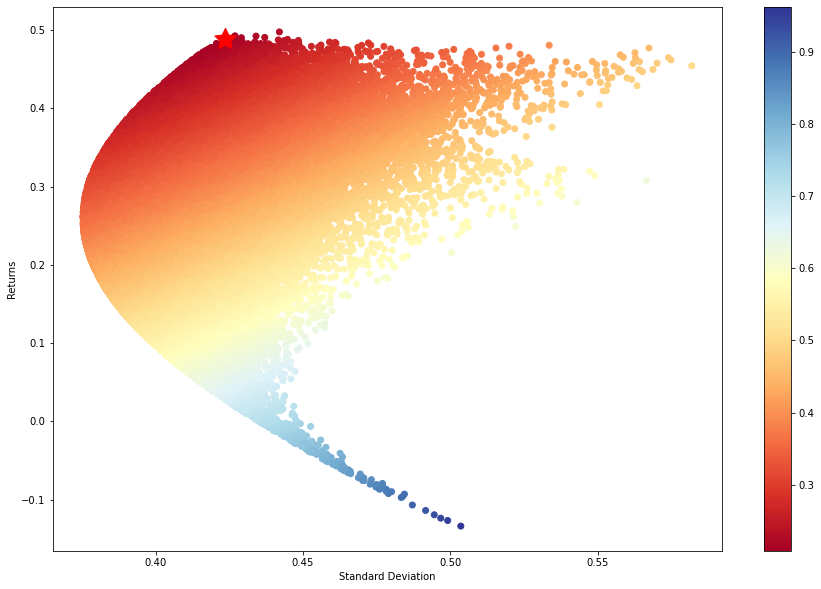

In [31]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[1],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [18]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
66365,0.569508,0.346237,4.038039e-07,0.158637,0.106691,0.013077,0.269637,0.451957


In [19]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var
def min_VaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_VaR = min_VaR(mean_returns, cov, alpha, days)

In [20]:
pd.DataFrame([round(x,2) for x in min_port_VaR['x']],index=tickers).T

,ASHOKLEY,BALMLAWRIE,NBCC,TATAPOWER,CDSL
0,0.01,0.18,0.0,0.22,0.6


In [21]:
df_stock['200_MA']=df_stock['Close'].rolling(window=200).mean()
df_stock['150_MA']=df_stock['Close'].rolling(window=150).mean()
df_stock['50_MA']=df_stock['Close'].rolling(window=50).mean()
df_stock['52W_Low'] = df_stock['Close'][-252:].min()
df_stock['52W_High'] = df_stock['Close'][-252:].max()

NameError: name 'df_stock' is not defined

In [109]:
metrics = {}
metrics['200 MA'] = df_stock['200_MA'][-1]
metrics['150 MA'] = df_stock['150_MA'][-1]
metrics['50 MA'] = df_stock['50_MA'][-1]
metrics['200 MA_1mago'] = df_stock['200_MA'][-30]
metrics['150 MA_1mago'] = df_stock['150_MA'][-30]
metrics['200 MA_2mago'] = df_stock['200_MA'][-60]
metrics['150 MA_2mago'] = df_stock['150_MA'][-60]
metrics['52W_Low'] = df_stock['Close'][-252:].min()
metrics['52W_High'] = df_stock['Close'][-252:].max()
metrics['price'] = df_stock['Close'][-1]

<Figure size 1440x720 with 0 Axes>

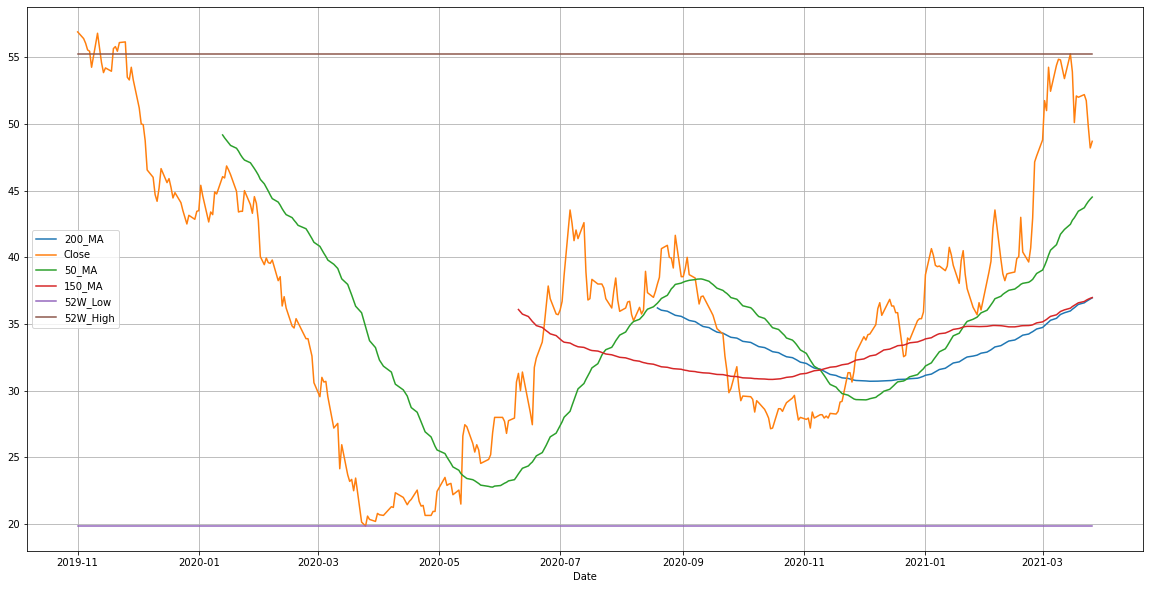

In [110]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Plot the closing prices for `df`
df_stock[['200_MA','Close','50_MA','150_MA','52W_Low','52W_High']].plot(grid=True,figsize=(20,10))
# Show the plot
plt.show()

In [111]:
#Current Price is at least 30% above 52 week low (1.3*low_of_52week)
metrics['Above_30%_low'] = metrics['52W_Low'] *1.3
# Condition 7: Current Price is within 25% of 52 week high   (.75*high_of_52week)
metrics['Within_25%_high'] = metrics['52W_High'] * 0.75

In [112]:

print(metrics)


{'200 MA': 36.96549999999997, '150 MA': 36.98166666666664, '50 MA': 44.51800000000001, '200 MA_1mago': 33.72524999999998, '150 MA_1mago': 34.78699999999997, '200 MA_2mago': 31.08299999999998, '150 MA_2mago': 33.81399999999997, '52W_Low': 19.85, '52W_High': 55.25, 'price': 48.7, 'Above_30%_low': 25.805000000000003, 'Within_25%_high': 41.4375}


In [113]:
metrics['condition1'] = (metrics['price'] > metrics['200 MA']) & (metrics['price'] > metrics['150 MA'])

metrics['condition2'] = metrics['150 MA'] > metrics['200 MA']
#3 The 200-day moving average line is trending up for 1 month 
metrics['condition3'] = metrics['200 MA'] > metrics['200 MA_1mago']
metrics['condition4'] = (metrics['50 MA'] > metrics['200 MA']) & (metrics['50 MA'] > metrics['150 MA'])
metrics['condition5'] = metrics['price'] > metrics['50 MA']
#6 The current stock price is at least 30 percent above its 52-week low
metrics['condition6'] = metrics['price'] > metrics['Above_30%_low']
#7 The current stock price is within at least 25 percent of its 52-week high.
metrics['condition7'] = metrics['price'] > metrics['Within_25%_high']

In [114]:
selection =(metrics['condition1'] == True) & (metrics['condition2'] == True) & (metrics['condition3'] == True) & (metrics['condition4'] == True)& (metrics['condition5'] == True) & (metrics['condition6'] == True) & (metrics['condition7'] == True) 


print(selection)

True
